# **Data Visualisation**

## Objectives

- Answer business requirement no.1:  
The client is interested in conducting a study to visually differentiate five rice varieties: Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

## Inputs

- Images are taken from the test, train, validation folders and their subfolders.  

         .
         ├── inputs   
         │   └──datasets_devided
         │      └──rice  
         │           ├── test  
         │           │   ├── Arborio  
         │           │   ├── Basmati  
         │           │   ├── Ipsala  
         │           │   ├── Jasmine 
         │           │   └── Karacadag
         │           ├── train
         │           │   ├── Arborio  
         │           │   ├── Basmati  
         │           │   ├── Ipsala  
         │           │   ├── Jasmine  
         │           │   └── Karacadag
         │           └── validation
         │               ├── Arborio  
         │               ├── Basmati  
         │               ├── Ipsala  
         │               ├── Jasmine  
         │               └── Karacadag  
         └── ...

## Outputs  

Generated code that addresses business requirement 1, which can be utilized to construct an image montage on the Streamlit dashboard.  

The average image sizes within the rice varieties dataset have been calculated and saved. These average dimensions are preserved in a pickle file format for efficient retrieval and usage in the application.  

Visualizations have been created to showcase the differences between average images of various rice varieties. This includes Arborio, Basmati, Ipsala, Jasmine, and Karacadag rice types. The results are stored in the combined_images folder, providing a clear visual comparison between different rice varieties.  

Image montages for each category of rice variety have been developed, offering a comprehensive visual overview of the characteristics of each class. This feature enhances the user's understanding of the distinct features that differentiate each rice variety and aids in the educational aspect of the Streamlit dashboard.

---

# Import Packages

In [1]:
! pip install -r /workspace/Rice-Detector/requirements.txt

# Change working directory

We store our Jupyter notebooks in a subfolder of the project. Therefore, when we run the notebooks in the editor, we need to change the working directory. This is necessary to ensure proper access to data files and other project resources that might be located outside the notebook's subfolder.

We need to change the working directory from its current folder to its parent folder

- To access the current working directory, we use the os.getcwd() command. 

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Rice-Detector/jupyter_notebooks'

Then, we change the working directory from its current folder to its parent folder to facilitate the correct file path references within our notebooks.

- os.path.dirname() gets the parent directory
- os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/Rice-Detector'

---

# Inspect data

### Counting Images in Each Category for Train, Validation, and Test Sets

This script is used to count the number of images in each category within the 'train', 'validation', and 'test' sets. This is a crucial step in ensuring that the data is evenly distributed across different categories, which is vital for training a balanced and unbiased machine learning model.

In [5]:
def count_images(data_dir):
    # Define the categories to count
    categories = ['train', 'validation', 'test']
    class_counts = {}

    for category in categories:
        path = os.path.join(data_dir, category)
        class_counts[category] = {}

        for class_name in os.listdir(path):
            # Path to each class within the category
            class_path = os.path.join(path, class_name)
            # Count files (images) in each class
            count = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
            class_counts[category][class_name] = count

    return class_counts

# Path to the data directory
data_dir = "inputs/datasets_devided"

# Count images and print results
class_distribution = count_images(data_dir)
for category, counts in class_distribution.items():
    print(f"{category.capitalize()} set:")
    for class_name, count in counts.items():
        print(f"  {class_name}: {count}")
    print()

Train set:
  Arborio: 10500
  Basmati: 10500
  Ipsala: 10500
  Jasmine: 10500
  Karacadag: 10500

Validation set:
  Arborio: 2250
  Basmati: 2250
  Ipsala: 2250
  Jasmine: 2250
  Karacadag: 2250

Test set:
  Arborio: 2250
  Basmati: 2250
  Ipsala: 2250
  Jasmine: 2250
  Karacadag: 2250



### Label Distribution - Bar Chart

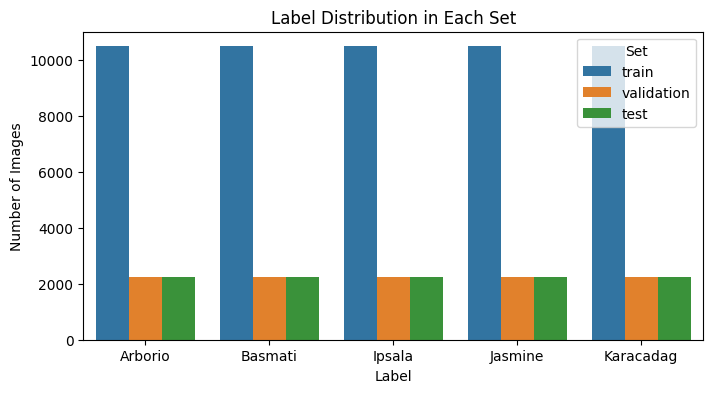

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert data to DataFrame for visualization
df_freq = pd.DataFrame([])
for category, counts in class_distribution.items():
    for class_name, count in counts.items():
        temp_df = pd.DataFrame({'Set': [category], 'Label': [class_name], 'Count': [count]})
        df_freq = pd.concat([df_freq, temp_df], ignore_index=True)

# Bar chart for label distribution
plt.figure(figsize=(8, 4))
sns.barplot(data=df_freq, x='Label', y='Count', hue='Set')
plt.title('Label Distribution in Each Set')
plt.ylabel('Number of Images')
plt.xlabel('Label')
plt.show()

### Set Distribution - Pie Chart

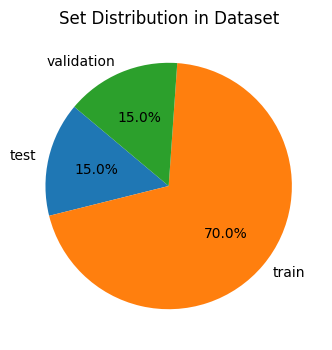

In [7]:
# Preparing data for the pie chart
set_distribution = df_freq.groupby('Set')['Count'].sum().reset_index()

# Pie chart for set distribution
plt.figure(figsize=(4, 4))
plt.pie(set_distribution['Count'], labels=set_distribution['Set'], autopct='%1.1f%%', startangle=140)
plt.title('Set Distribution in Dataset')
plt.show()

Summary of Results:

The data distribution across 'train', 'validation', and 'test' sets is balanced, with each category being well-represented in all sets.  
The 'train', 'validation' and 'test' sets have a good representation of each category, ensuring that the model's performance can be accurately evaluated on diverse data samples.  
This balanced distribution of data is essential for building a machine learning model that can generalize well across different categories and reduce the risk of overfitting to a specific category.

### Analyze and visualize the dimensions of images in the training set

The script iterates through each image in the training set, across all classes, and collects their width and height.  
A scatter plot is generated to visualize the distribution of image dimensions. This helps in understanding the variability in image sizes.  
The script calculates the average width and height of the images. This is important for decisions regarding image preprocessing, such as resizing.  
The determined average image size can also guide the design of neural network architectures, particularly in choosing appropriate filter sizes and layer configurations for convolutional neural networks (CNNs).  
Standardizing image sizes can lead to more efficient training processes, as uniform image dimensions might reduce computational complexity.

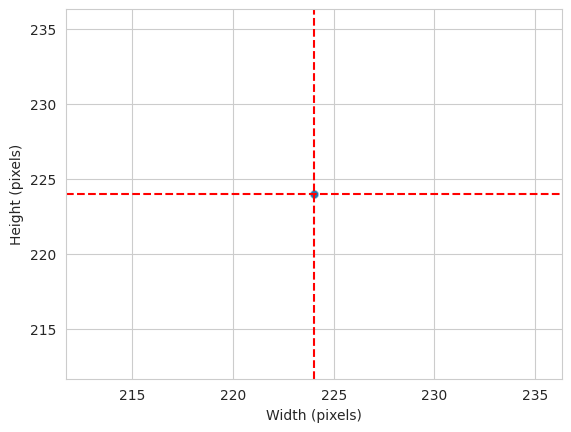

Average Image Width: 224 pixels 
Average Image Height: 224 pixels


In [8]:
from matplotlib.image import imread
import numpy as np

# Set the path to the training data directory
train_path = 'inputs/datasets_devided/train'

# Get the list of folders (classes)
labels = os.listdir(train_path)

dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        # Read the image file
        img = imread(os.path.join(train_path, label, image_filename))
        # Get image dimensions
        d1, d2, _ = img.shape
        dim1.append(d1)  # Append image height
        dim2.append(d2)  # Append image width

# Set the style for the plot
sns.set_style("whitegrid")
# Create a subplot
fig, axes = plt.subplots()
# Plot the scatterplot of image dimensions
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
# Set x and y axis labels
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
# Calculate and plot average image dimensions
dim1_mean = int(np.mean(dim1))
dim2_mean = int(np.mean(dim2))
axes.axvline(x=dim2_mean, color='r', linestyle='--')  # Average width line
axes.axhline(y=dim1_mean, color='r', linestyle='--')  # Average height line
# Show the plot
plt.show()
# Print the average image dimensions
print(f"Average Image Width: {dim2_mean} pixels \nAverage Image Height: {dim1_mean} pixels")

The average size of images used for training the model is 224x224 pixels.  Adopting this uniform size is particularly beneficial as it aligns well with the standard input sizes required by many pre-trained neural network models, including MobileNetV2. This compatibility is crucial for efficiently leveraging these models' capabilities without the need for additional image resizing or preprocessing steps.

### Saving Average Image Dimensions

This script is intended to save the average dimensions of images in the training dataset for standardizing the input size of images for machine learning models, especially for models that require a fixed input size, such as convolutional neural networks.

In [9]:
import os
import joblib

# Pre-determined average dimensions of images
average_width = 224
average_height = 224

# Creating a tuple with image dimensions
image_shape = (average_height, average_width, 3)  # Height, width, color channels

# Path and filename for saving
file_path = "outputs/v1"

# Create the directory if it does not exist
os.makedirs(file_path, exist_ok=True)

filename = f"{file_path}/image_shape.pkl"

# Saving the image dimensions
joblib.dump(value=image_shape, filename=filename)

# Output message confirming the save
print(f"Saved image dimensions: {image_shape} to {filename}")

Saved image dimensions: (224, 224, 3) to outputs/v1/image_shape.pkl


### Color Distribution Analysis in Image Dataset

The provided script performs a color distribution analysis on a sample of images from a dataset. It aims to understand the prevalence and variation of color intensity levels across the red, green, and blue channels of the images.  
analyze_color_distribution(images, n_images=100): This function takes an array of images and an optional parameter specifying the number of images to sample for the analysis. It calculates the average color intensity for each color channel in the sampled images and visualizes the distribution of these intensities using histograms.  
For each sampled image, the average color intensity is calculated for the red, green, and blue channels.  
The function plots three histograms to represent the distribution of average color intensities for each channel. This visualization helps identify the dominant colors in the sample and the diversity of color usage.  
To determine whether there is a dominant color trend across the sample which could influence the design of image processing or machine learning algorithms.  
To assess the variability of color intensities which might indicate the need for data augmentation or preprocessing steps to normalize the color distribution.  
To provide insights into the dataset that can guide decisions on whether color-based features are significant for tasks such as image classification.  

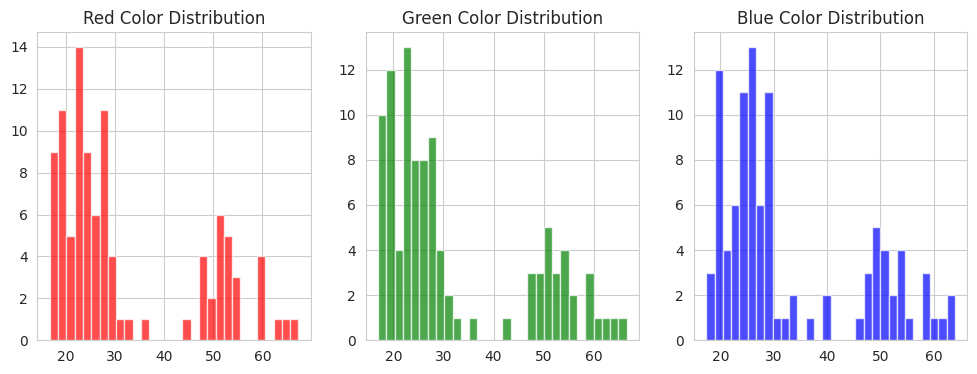

In [20]:
from tensorflow.keras.preprocessing import image

def load_images_from_subdirs(directory, n_images=100):
    images = []
    subdirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    for subdir in subdirs:
        subdir_path = os.path.join(directory, subdir)
        loaded_images = 0
        for img_name in os.listdir(subdir_path):
            if loaded_images >= n_images:
                break
            img_path = os.path.join(subdir_path, img_name)
            img = image.load_img(img_path)
            img_array = image.img_to_array(img)
            images.append(img_array)
            loaded_images += 1
    return np.array(images)

def analyze_color_distribution(images, n_images=100):
    """
    Analyze and visualize the color distribution of a sample of images.

    Parameters:
    images (array): Array of images.
    n_images (int): Number of images to sample for the analysis.
    """
    # Ensure there are enough images for sampling
    n_images = min(n_images, len(images))

    # Generate random indices for sampling images
    indices = np.random.choice(len(images), n_images, replace=False)
    sample_images = images[indices]

    # Lists to store color channel data
    reds, greens, blues = [], [], []

    # Process each image in the sample
    for img in sample_images:
        # Calculate the average color per image
        avg_color_per_row = np.mean(img, axis=0)
        avg_color = np.mean(avg_color_per_row, axis=0)
        reds.append(avg_color[0])
        greens.append(avg_color[1])
        blues.append(avg_color[2])

    # Visualize the distribution of colors
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(reds, bins=30, color='red', alpha=0.7)
    plt.title('Red Color Distribution')
    plt.subplot(1, 3, 2)
    plt.hist(greens, bins=30, color='green', alpha=0.7)
    plt.title('Green Color Distribution')
    plt.subplot(1, 3, 3)
    plt.hist(blues, bins=30, color='blue', alpha=0.7)
    plt.title('Blue Color Distribution')
    plt.show()

directory = 'inputs/datasets_devided/train'
X = load_images_from_subdirs(directory, n_images=100)
# Assuming X is an array of images
analyze_color_distribution(X)

Color Distribution Analysis Results:  

The histograms generated from the sample of images reveal a balanced distribution across the red, green, and blue color channels. Each color channel exhibits a varied intensity distribution, without any particular skewness towards high or low values. This suggests a diverse color palette within the analyzed images.  
The balanced nature of these histograms indicates that the images possess a rich mixture of colors, with no single color overpowering the others. This is a positive sign for image-based machine learning tasks, as it suggests that color features may potentially play a significant role in model differentiation and classification tasks.  
Given the balanced color distribution, it is determined that no immediate color correction or adjustment is required prior to model training. This allows us to proceed with the current color settings, maintaining the natural color fidelity of the images for any machine learning applications.

---

# Loading and Visualizing Image Data

### Visualization of Differences Between Average Images in each class

This script is designed to load a subset of images from each class in the dataset and visualize their average and variability characteristics. This aids in understanding the general features and diversity within each class, which can be crucial for the development and tuning of machine learning models.

The load_image_as_array function loads a specified number of images for each class. It resizes these images and converts them into arrays, preparing a standardized dataset for further analysis.

The plot_average_and_variability_images function visualizes both the average and variability of the images for each class. The average visualization provides insights into the general appearance of each class, helping to understand the distinct features that characterize each class. The variability visualization, on the other hand, highlights the diversity within each class, showing how much individual images differ from the average.

The script not only focuses on showcasing the average and variability characteristics of the classes through visual representations but also saves these visualizations as images. These saved images are particularly useful for presentations, exploratory data analysis, and as reference materials. They are stored in a specified output directory, which the script creates if it does not exist. This ensures organized and accessible data for various purposes.

Note: The current version of the script includes functionalities for calculating and visualizing the average and variability images per class. The visualizations are saved as images in a specified directory, making them suitable for use in presentations or further analyses outside the Jupyter Notebook environment.

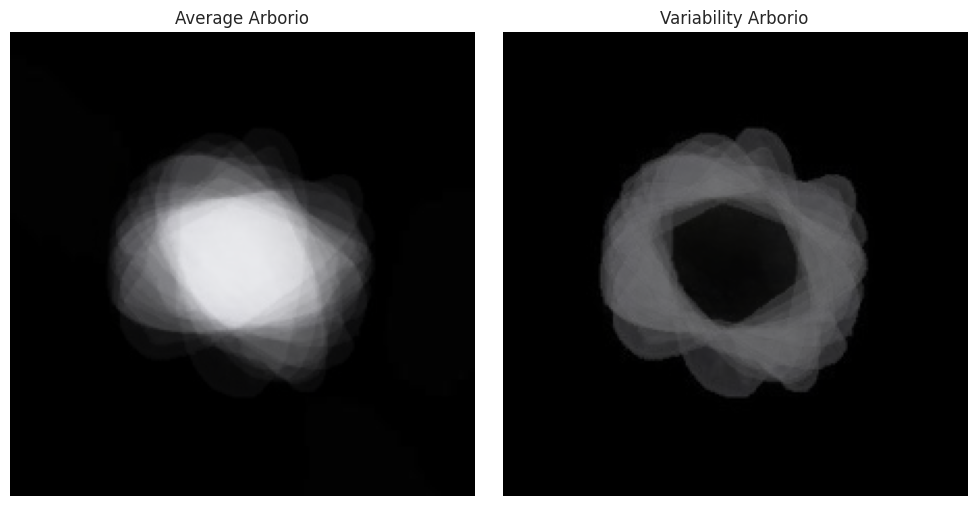

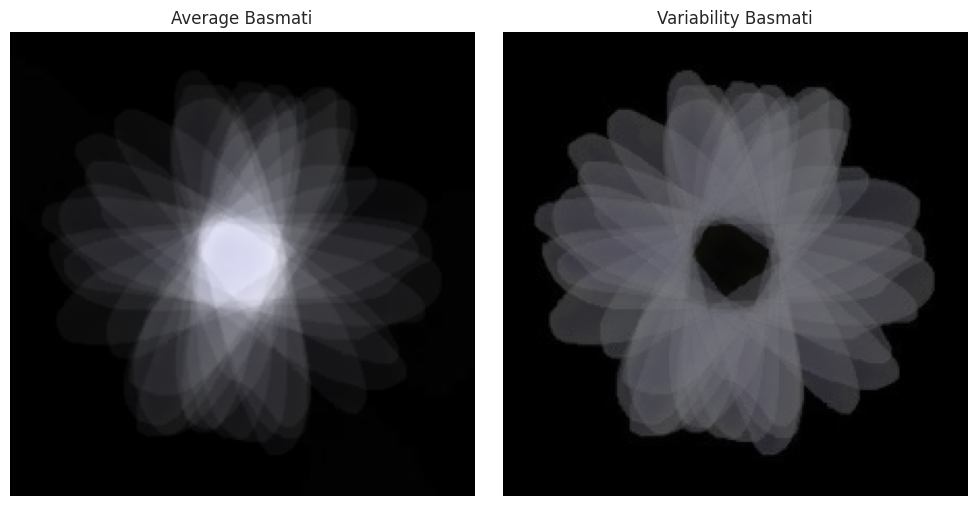

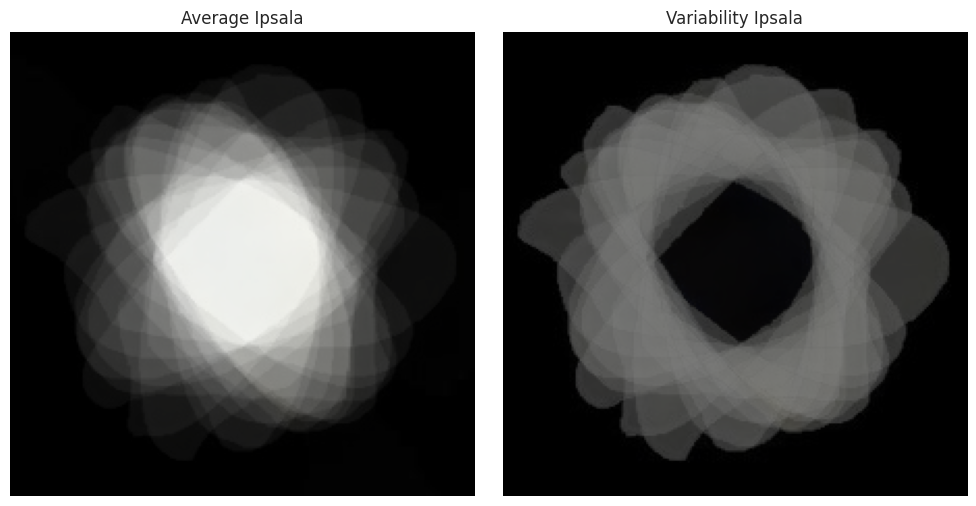

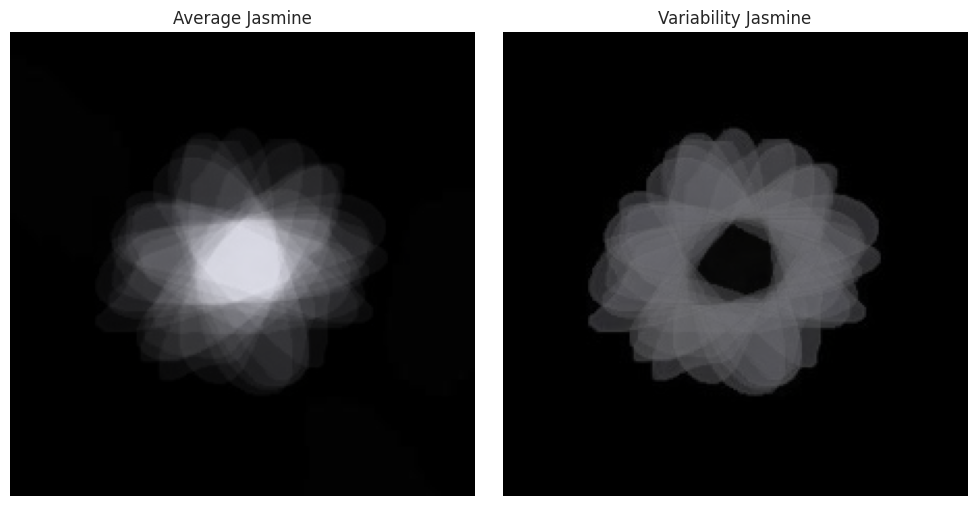

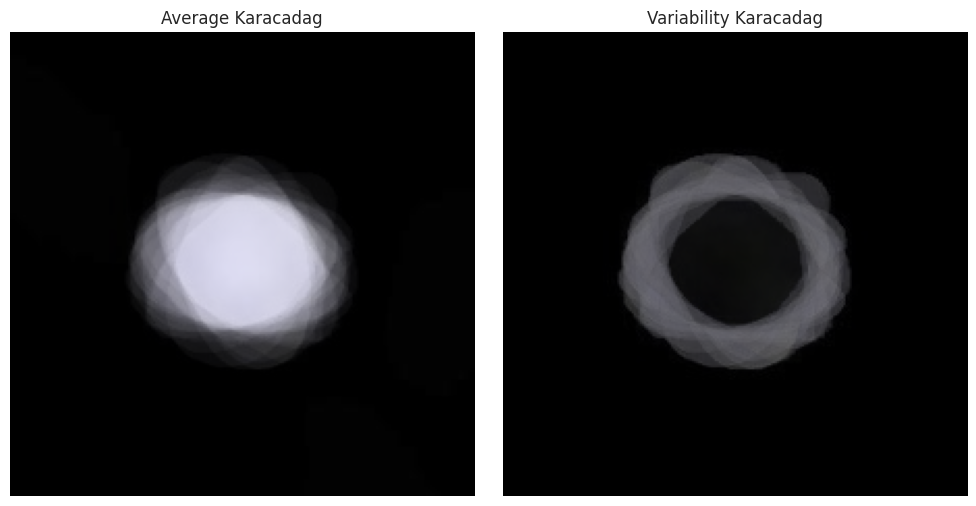

In [21]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(224, 224), n_images_per_label=20):
    """
    Load a specified number of images from each class as arrays.
    :param my_data_dir: Directory containing the image datasets.
    :param new_size: The new size to which the images will be resized.
    :param n_images_per_label: Number of images to load per label/class.
    :return: Arrays of images and their corresponding labels.
    """
    X, y = [], []
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        label_dir = os.path.join(my_data_dir, label)
        if os.path.isdir(label_dir):
            for image_filename in os.listdir(label_dir):
                if counter < n_images_per_label:
                    img_path = os.path.join(label_dir, image_filename)
                    img = image.load_img(img_path, target_size=new_size)
                    img_array = image.img_to_array(img) / 255
                    X.append(img_array)
                    y.append(label)
                    counter += 1

    return np.array(X), np.array(y)

def plot_average_and_variability_images(X, y, output_dir):
    """
    Calculate and plot average and variability images for each class.
    :param X: Array of images.
    :param y: Array of labels corresponding to X.
    :param output_dir: Directory where the images will be saved.
    """
    unique_labels = np.unique(y)
    output_subdir = os.path.join(output_dir, "average_images")
    os.makedirs(output_subdir, exist_ok=True)

    for label in unique_labels:
        label_indices = np.where(y == label)[0]
        label_images = X[label_indices]
        avg_img = np.mean(label_images, axis=0)
        var_img = np.std(label_images, axis=0)

        plt.figure(figsize=(10, 5))

        # Plot average image
        ax1 = plt.subplot(1, 2, 1)
        ax1.imshow(avg_img)
        ax1.set_title(f'Average {label}')
        ax1.axis('off')

        # Plot variability image
        ax2 = plt.subplot(1, 2, 2)
        ax2.imshow(var_img)
        ax2.set_title(f'Variability {label}')
        ax2.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_subdir, f'{label}_average_variability.png'))
        plt.show()

# Paths to the directory containing images and the directory to save results
my_data_dir = 'inputs/datasets_devided/train'
output_dir = 'outputs'

# Load images and create average and variability images
X, y = load_image_as_array(my_data_dir, new_size=(224, 224), n_images_per_label=20)
plot_average_and_variability_images(X, y, output_dir)

### Image Montage

This script is designed to create and display montages of images from different classes in a dataset. It can be used for presentations.   
image_montage function creates a montage of randomly selected images from a specified class within the dataset. It arranges these images in a grid layout defined by the number of rows (rows) and columns (ncols). The function also saves each montage to a specified output directory.  
For each class, the script randomly selects images to include in the montage, providing a varied representation of the class.
Users can specify the number of rows and columns for the montage, allowing flexibility in how the images are presented.  
Each created montage is displayed inline (e.g., within a Jupyter Notebook) and saved as a PNG file in the specified output directory.  
The script automatically creates the output directory if it does not exist, ensuring that the montages are saved without any manual directory setup.

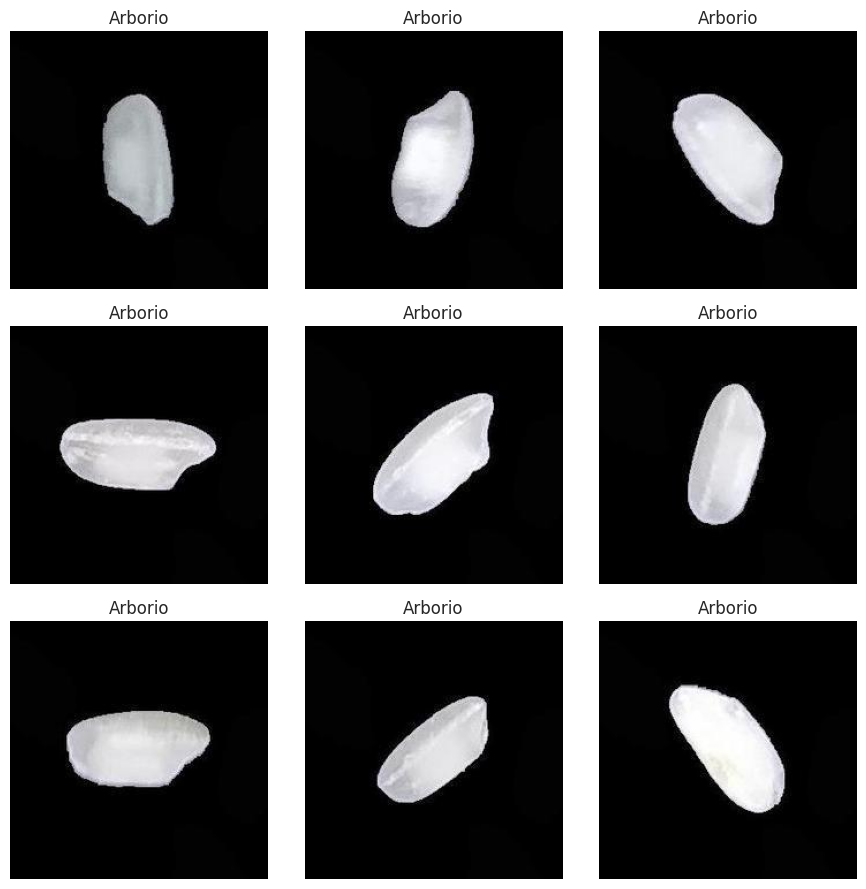

Montage for Arborio saved as outputs/v1/montage_Arborio.png


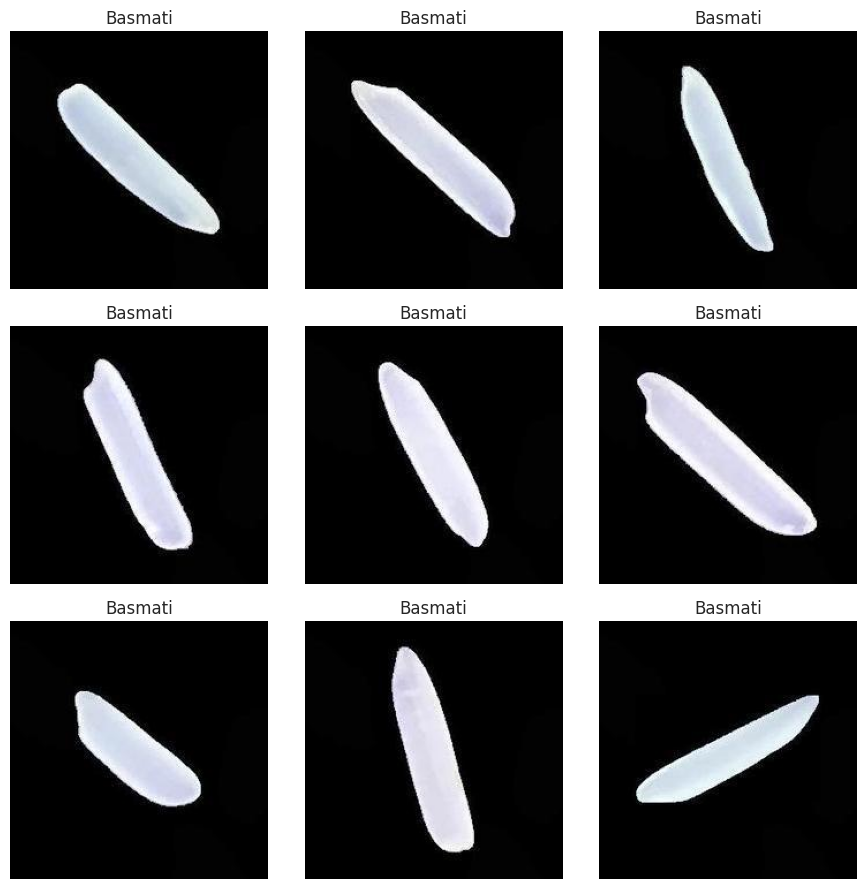

Montage for Basmati saved as outputs/v1/montage_Basmati.png


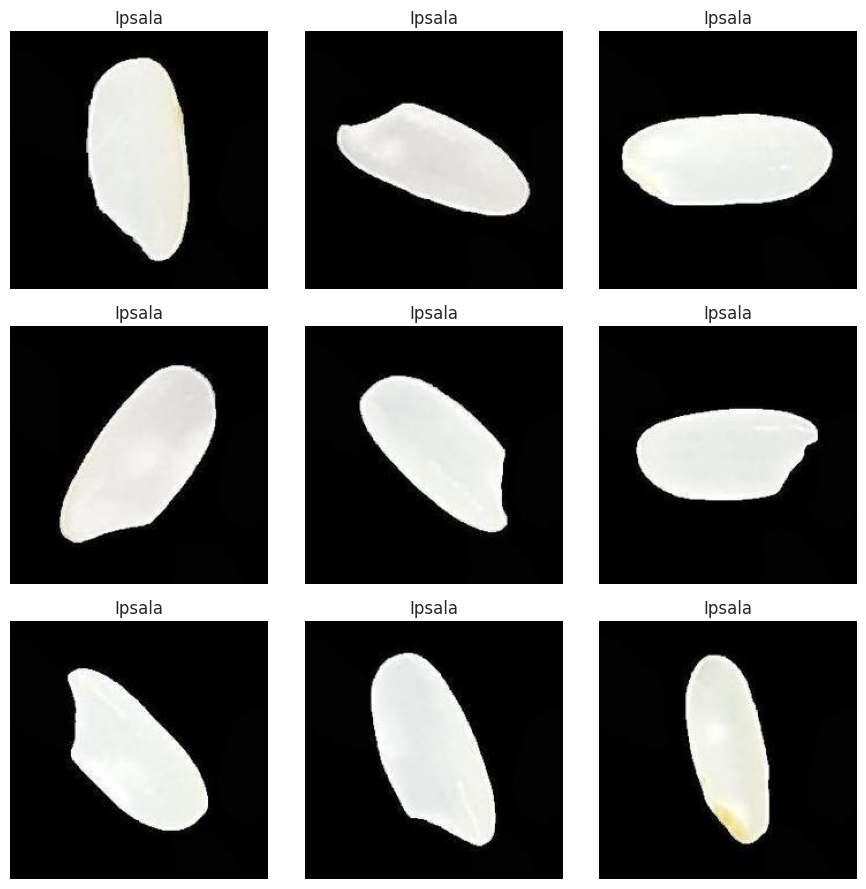

Montage for Ipsala saved as outputs/v1/montage_Ipsala.png


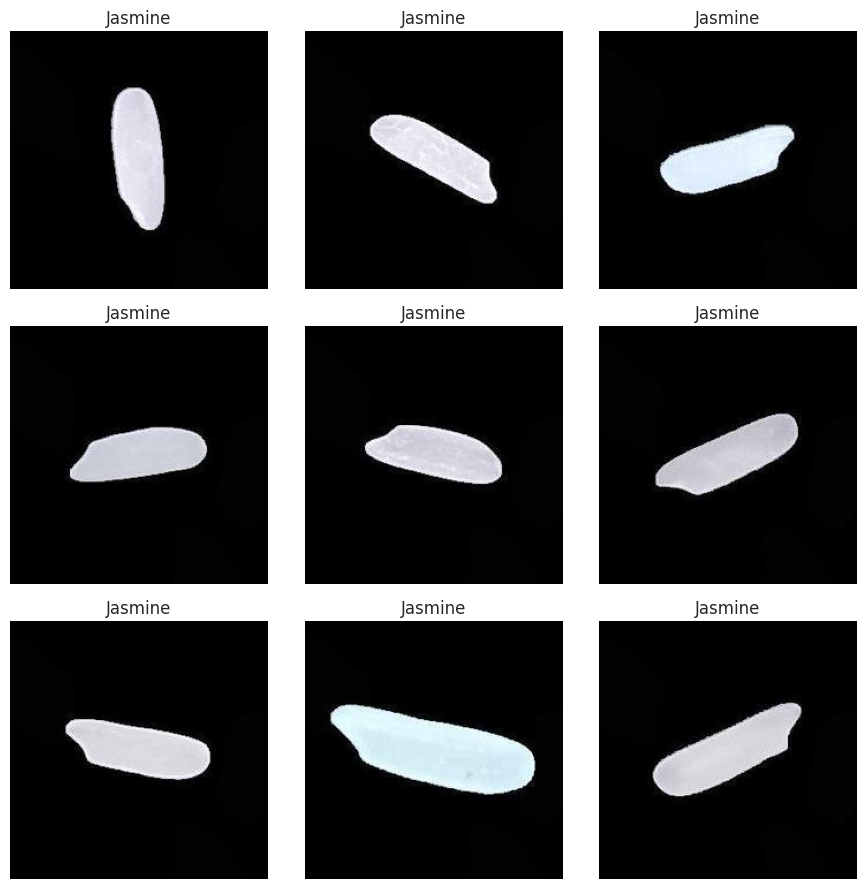

Montage for Jasmine saved as outputs/v1/montage_Jasmine.png


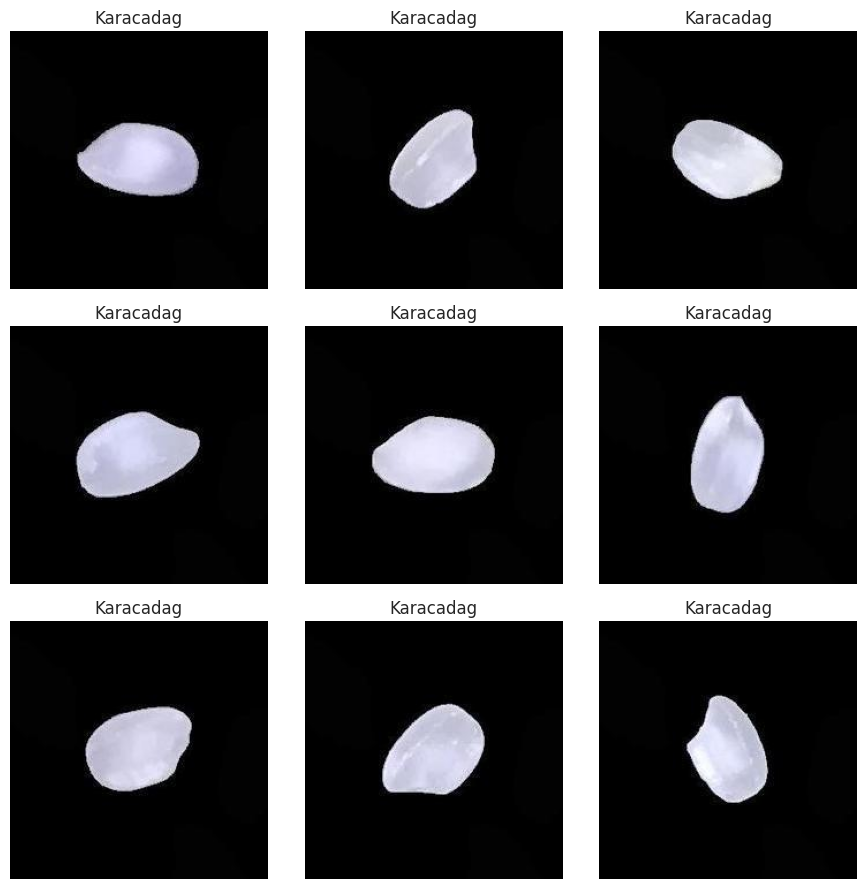

Montage for Karacadag saved as outputs/v1/montage_Karacadag.png


In [22]:
import random
import itertools
import numpy as np

def image_montage(dir_path, label_to_display, nrows, ncols, output_dir, figsize=(15, 10)):
    """
    Create and save an image montage for a specific label.

    Parameters:
    dir_path (str): Path to the directory containing images.
    label_to_display (str): Label of images to display in the montage.
    nrows (int): Number of rows in the montage.
    ncols (int): Number of columns in the montage.
    output_dir (str): Directory to save the montage image.
    figsize (tuple): Size of the figure.
    """
    labels = os.listdir(dir_path)

    if label_to_display in labels:
        images_list = os.listdir(os.path.join(dir_path, label_to_display))
        if nrows * ncols <= len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(f"Not enough images for montage. Needed: {nrows * ncols}, available: {len(images_list)}")
            return

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for idx, img_name in enumerate(img_idx):
            img_path = os.path.join(dir_path, label_to_display, img_name)
            img = image.load_img(img_path)
            img = image.img_to_array(img)
            img /= 255.0

            ax = axes[idx // ncols, idx % ncols]
            ax.imshow(img)
            ax.set_title(f"{label_to_display}")
            ax.axis('off')

        plt.tight_layout()
        montage_filename = f"montage_{label_to_display}.png"
        montage_path = os.path.join(output_dir, montage_filename)
        plt.savefig(montage_path)
        plt.show()
        plt.close()
        print(f"Montage for {label_to_display} saved as {montage_path}")



dir_path = 'inputs/datasets_devided/train'
output_dir = 'outputs/v1'
os.makedirs(output_dir, exist_ok=True)

labels = os.listdir(dir_path)
for label in labels:
    image_montage(dir_path, label, nrows=3, ncols=3, output_dir=output_dir, figsize=(9, 9))